##RANDOM FOREST CLSSIFIER

##Import the necessary libraries

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ML model
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#Load the datset

In [ ]:
data=pd.read_csv('/content/kenyan_students_funding_2024_2025.csv')

##EDA

view the datset

In [ ]:
data.head()

,student_id,county,household_income,public_uni,program_cost_per_year,got_helb,helb_amount,scholarship_amount,other_support,can_afford_basics,financial_stress_level,likely_to_dropout,academic_performance,mental_health_risk
0,S001,Nairobi,35000,1,100000,1,40000,20000,10000,1,Medium,0,3.2,Medium
1,S002,Kisumu,15000,1,80000,0,0,30000,5000,0,High,1,2.8,High
2,S003,Nakuru,50000,0,180000,1,50000,0,20000,0,High,1,2.5,High
3,S004,Turkana,5000,1,60000,1,30000,40000,0,1,Low,0,3.5,Low
4,S005,Garissa,10000,1,90000,0,0,10000,3000,0,High,1,2.7,High


In [ ]:
data.tail()

,student_id,county,household_income,public_uni,program_cost_per_year,got_helb,helb_amount,scholarship_amount,other_support,can_afford_basics,financial_stress_level,likely_to_dropout,academic_performance,mental_health_risk
415,S153,Nakuru,50000,0,180000,1,50000,0,20000,0,High,1,2.6,High
416,S154,Turkana,5000,1,60000,1,25000,40000,0,1,Low,0,3.5,Low
417,S155,Garissa,10000,1,90000,0,0,10000,3000,0,High,1,2.8,High
418,S156,Mombasa,45000,1,120000,1,45000,15000,15000,1,Medium,0,3.0,Medium
419,S157,Kakamega,20000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe(include='all')

,student_id,county,household_income,public_uni,program_cost_per_year,got_helb,helb_amount,scholarship_amount,other_support,can_afford_basics,financial_stress_level,likely_to_dropout,academic_performance,mental_health_risk
count,420,418,417,417,416,416,415,415,414,414,414,414,413,413
unique,162,34,17,5,20,5,11,11,12,4,5,4,13,4
top,S001,Nairobi,10000,1,70000,1,0,0,0,1,High,0,3.2,High
freq,3,16,41,330,53,275,137,83,81,231,180,231,42,180


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   student_id              420 non-null    object
 1   county                  418 non-null    object
 2   household_income        417 non-null    object
 3   public_uni              417 non-null    object
 4   program_cost_per_year   416 non-null    object
 5   got_helb                416 non-null    object
 6   helb_amount             415 non-null    object
 7   scholarship_amount      415 non-null    object
 8   other_support           414 non-null    object
 9   can_afford_basics       414 non-null    object
 10  financial_stress_level  414 non-null    object
 11  likely_to_dropout       414 non-null    object
 12  academic_performance    413 non-null    object
 13  mental_health_risk      413 non-null    object
dtypes: object(14)
memory usage: 46.1+ KB


missing values

In [ ]:
data.isnull().sum()

,0
student_id,0
county,2
household_income,3
public_uni,3
program_cost_per_year,4
got_helb,4
helb_amount,5
scholarship_amount,5
other_support,6
can_afford_basics,6


Visualize Key Distributions

sns.histplot(df['household_income'], bins=30)


/tmp/ipython-input-13-30328000.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


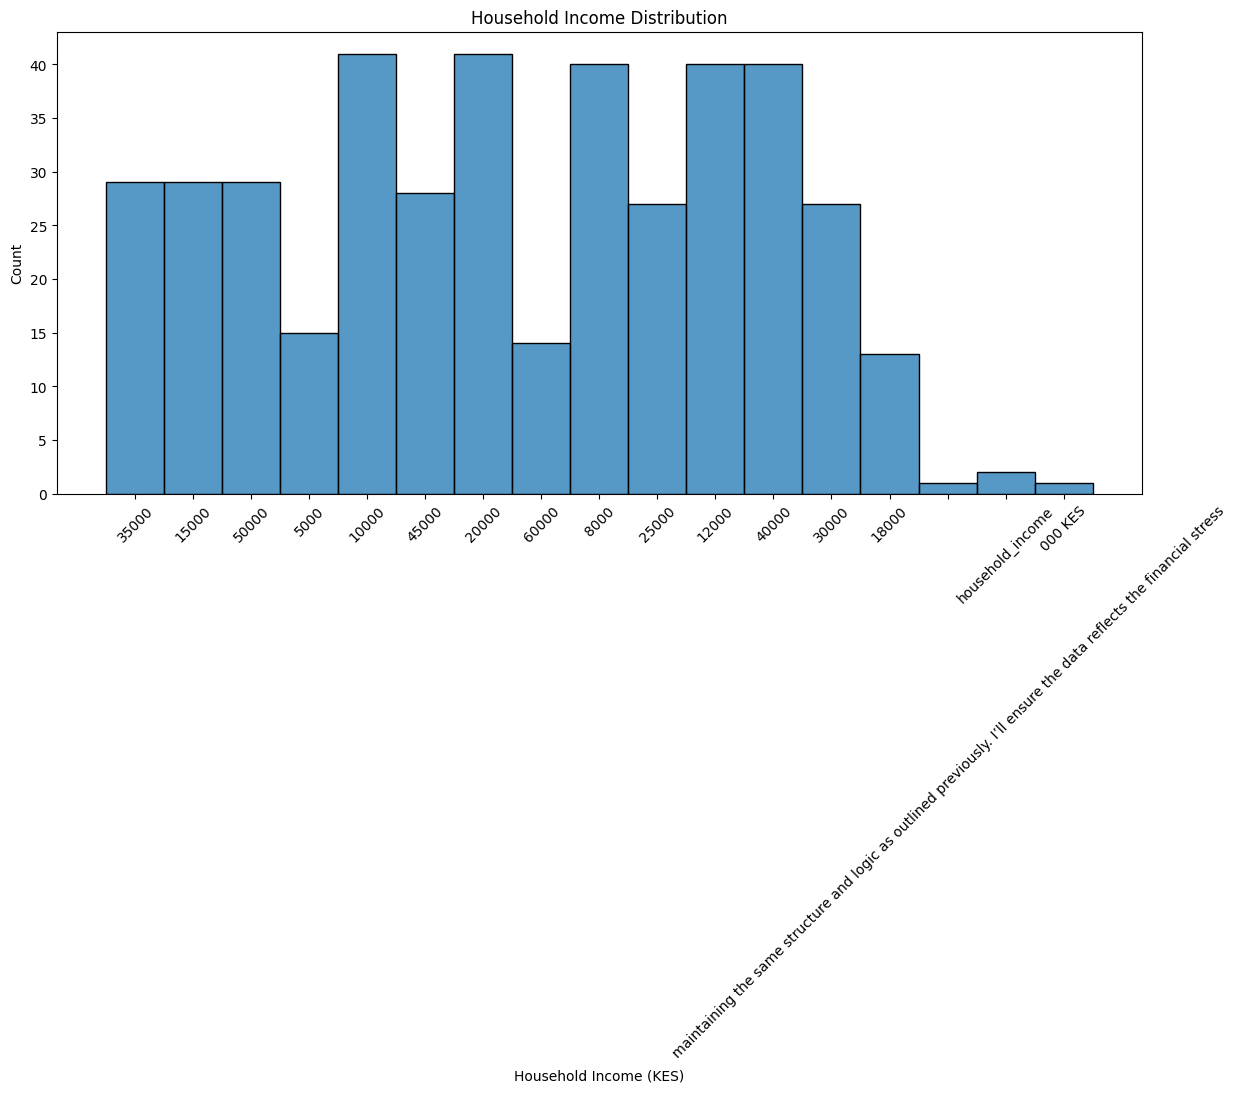

In [13]:
plt.figure(figsize=(14, 6))
sns.histplot(data['household_income'], bins=20, kde=False)

plt.xticks(rotation=45)  # rotate labels for readability
plt.title('Household Income Distribution')
plt.xlabel('Household Income (KES)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#Check the correlation

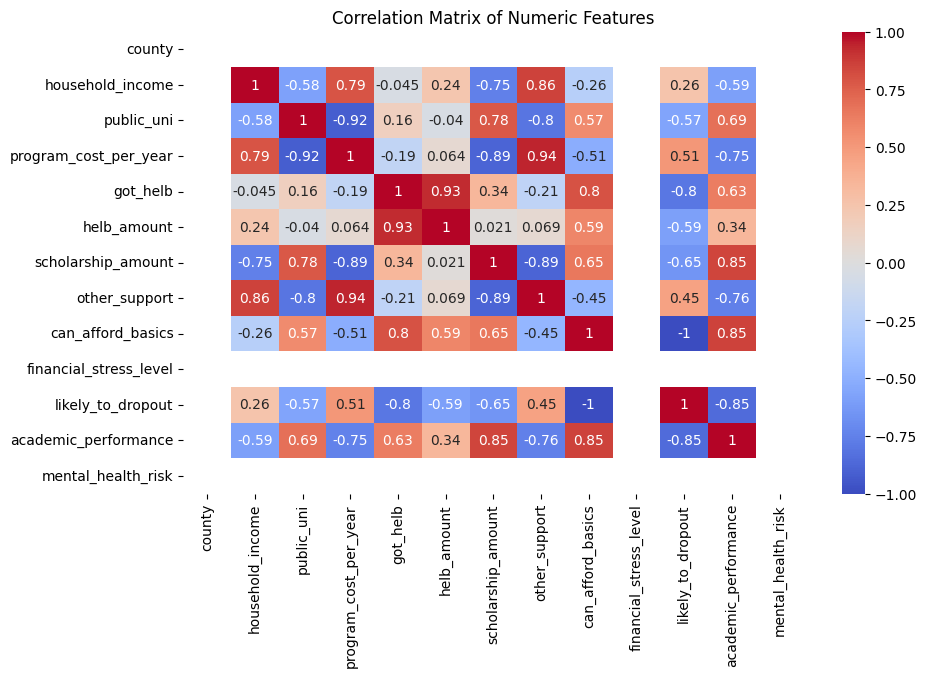

In [16]:
# Drop the 'student_id' column as it is not numeric and not needed for correlation
data_numeric = data.drop('student_id', axis=1)

# Convert remaining columns to numeric, coercing errors to NaN
for col in data_numeric.columns:
    data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Calculate and plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#Handling missing data and data cleaning

In [18]:
data.isnull().sum()

,0
student_id,0
county,2
household_income,3
public_uni,3
program_cost_per_year,4
got_helb,4
helb_amount,5
scholarship_amount,5
other_support,6
can_afford_basics,6


In [21]:
# Convert columns to numeric before imputation
numeric_cols = ['household_income', 'program_cost_per_year', 'helb_amount', 'scholarship_amount', 'other_support', 'academic_performance', 'likely_to_dropout', 'got_helb', 'can_afford_basics']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill categorical columns with mode
for col in ['county', 'financial_stress_level', 'mental_health_risk', 'public_uni']:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill numerical columns with median or zero after conversion
data['household_income'] = data['household_income'].fillna(data['household_income'].median())
data['program_cost_per_year'] = data['program_cost_per_year'].fillna(data['program_cost_per_year'].median())
data['scholarship_amount'] = data['scholarship_amount'].fillna(0)
data['helb_amount'] = data['helb_amount'].fillna(0)
data['other_support'] = data['other_support'].fillna(0)
data['academic_performance'] = data['academic_performance'].fillna(data['academic_performance'].mean())

# Fill binary columns with 0
data['got_helb'] = data['got_helb'].fillna(0)
data['can_afford_basics'] = data['can_afford_basics'].fillna(0)


# Drop rows where target is missing (we can’t train on these)
data.dropna(subset=['likely_to_dropout'], inplace=True)

In [22]:
data.isnull().sum()


,0
student_id,0
county,0
household_income,0
public_uni,0
program_cost_per_year,0
got_helb,0
helb_amount,0
scholarship_amount,0
other_support,0
can_afford_basics,0


#Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode ordinal categories (Low < Medium < High)
data['financial_stress_level'] = le.fit_transform(data['financial_stress_level'])  # Low=0, Med=1, High=2
data['mental_health_risk'] = le.fit_transform(data['mental_health_risk'])


# If counties are important to your story, use this:
data['county'] = le.fit_transform(data['county'])  # Nairobi=0, Kisumu=1, etc.


#Check the datset

In [24]:
data[['financial_stress_level', 'mental_health_risk']].head()


,financial_stress_level,mental_health_risk
0,2,2
1,0,0
2,0,0
3,1,1
4,0,0


#Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# List of columns to scale
cols_to_scale = [
    'household_income',
    'program_cost_per_year',
    'helb_amount',
    'scholarship_amount',
    'other_support'
]

# Apply scaling
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Optional check
data[cols_to_scale].head()


,household_income,program_cost_per_year,helb_amount,scholarship_amount,other_support
0,0.634980,-0.048586,0.836381,0.190024,-0.015189
1,-0.666325,-0.499862,-1.302049,1.057799,-0.627219
2,1.610958,1.756515,1.370989,-1.545527,1.208871
3,-1.316977,-0.951137,0.301774,1.925575,-1.239249
4,-0.991651,-0.274224,-1.302049,-0.677752,-0.872031


#Split the data into features (X) and target (y)

In [27]:
X = data[['household_income', 'got_helb', 'helb_amount', 'scholarship_amount',
          'program_cost_per_year', 'financial_stress_level']]

# Define your target
y = data['likely_to_dropout']

#Split into training and test sets

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train the model

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
y_pred = model.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
[[49  0]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        49
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [32]:
['household_income', 'got_helb', 'helb_amount', 'scholarship_amount', 'program_cost_per_year', 'financial_stress_level']


['household_income',
 'got_helb',
 'helb_amount',
 'scholarship_amount',
 'program_cost_per_year',
 'financial_stress_level']